In [1]:
import neo
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.cm as cm
from sklearn.cluster import KMeans
import seaborn as sns

## Loadning data

In [4]:
## Loadning of data
### 2D data
# List of filenames for each eye
filenames_2D = [
    "/Users/marielunde/Desktop/Thesis/all data/2D/Eye 1/10Hz_1V_neg500mV_1ms005.ns5",
    "/Users/marielunde/Desktop/Thesis/all data/2D/Eye 2/10Hz_1V_neg500mV_1ms007.ns5",
    "/Users/marielunde/Desktop/Thesis/all data/2D/Eye 3/10Hz_1V_neg500mV_1ms007.ns5",
    "/Users/marielunde/Desktop/Thesis/all data/2D/Eye 4/10Hz_1V_neg500mV_1ms.ns5",
    "/Users/marielunde/Desktop/Thesis/all data/2D/Eye 5/10Hz_1V_neg500mV_1ms002.ns5",
    "/Users/marielunde/Desktop/Thesis/all data/2D/Eye 6/10Hz_1V_neg500mV_1ms005.ns5"
]

# Initialize an empty list to hold the data from all eyes
all_data_2D = []
filtered_data = []

# Parameters for the low-pass filter
fs = 30000  # Sampling frequency (Hz)
cutoff_frequency = 50  # Cutoff frequency for the low-pass filter (Hz)

# Loop through each file and read the data
for filename in filenames_2D:
    print(f"Reading data from file: {filename}")
    reader = neo.io.BlackrockIO(filename=filename)
    
    # Read the data from the file
    block_SA = reader.read_block()
    
    # Access the first segment
    segment_SA = block_SA.segments[0]
    
    # Access the first analog signal within this segment
    analog_signal_SA = segment_SA.analogsignals[0]
    
    # Access the signal data as a NumPy array and append it to the list
    data_SA = np.asarray(analog_signal_SA.magnitude)
    all_data_2D.append(data_SA)

all_data_2D = np.array(all_data_2D)
all_data_2D = np.transpose(all_data_2D, (0, 2, 1)) 
average_per_eye_2D = np.mean(all_data_2D, axis=1)


# List of filenames for each eye
filenames_2D_TTX = [
    "/Users/marielunde/Desktop/Thesis/all data/2D/Eye 1/10Hz_1V_neg500mV_1ms_TTX006.ns5",
    "/Users/marielunde/Desktop/Thesis/all data/2D/Eye 2/10Hz_1V_neg500mV_1ms_TTX008.ns5",
    "/Users/marielunde/Desktop/Thesis/all data/2D/Eye 3/10Hz_1V_neg500mV_1ms_TTX008.ns5",
    "/Users/marielunde/Desktop/Thesis/all data/2D/Eye 4/10Hz_1V_neg500mV_1ms_TTX001.ns5",
    "/Users/marielunde/Desktop/Thesis/all data/2D/Eye 5/10Hz_1V_neg500mV_1ms_TTX003.ns5",
    "/Users/marielunde/Desktop/Thesis/all data/2D/Eye 6/10Hz_1V_neg500mV_1ms_TTX006.ns5"
]

# Initialize an empty list to hold the data from all eyes
all_data_2D_TTX = []
average_per_eye_2D_TTX = []

# Parameters for the low-pass filter
fs = 30000  # Sampling frequency (Hz)
cutoff_frequency = 50  # Cutoff frequency for the low-pass filter (Hz)

# Loop through each file and read the data
for filename in filenames_2D_TTX:
    print(f"Reading data from file: {filename}")
    reader = neo.io.BlackrockIO(filename=filename)
    
    # Read the data from the file
    block_SA = reader.read_block()
    
    # Access the first segment
    segment_SA = block_SA.segments[0]
    
    # Access the first analog signal within this segment
    analog_signal_SA = segment_SA.analogsignals[0]
    
    # Access the signal data as a NumPy array and append it to the list
    data_SA = np.asarray(analog_signal_SA.magnitude)
    all_data_2D_TTX.append(data_SA[:300300])

all_data_2D_TTX = np.array(all_data_2D_TTX)
all_data_2D_TTX = np.transpose(all_data_2D_TTX, (0, 2, 1)) 
average_per_eye_2D_TTX = np.mean(all_data_2D_TTX, axis=1)

# List of filenames for each eye
filenames_2D_no_stim = [
    "/Users/marielunde/Desktop/Thesis/all data/2D/Eye 1/NO_STIM_NO_GEN004.ns5",
    "/Users/marielunde/Desktop/Thesis/all data/2D/Eye 2/NO_STIM_NO_GEN006.ns5",
    "/Users/marielunde/Desktop/Thesis/all data/2D/Eye 3/NO_STIM_NO_GEN006.ns5",
    "/Users/marielunde/Desktop/Thesis/all data/2D/Eye 4/NO_STIM_NO_GEN001.ns5",
    "/Users/marielunde/Desktop/Thesis/all data/2D/Eye 5/NO_STIM_NO_GEN001.ns5",
    "/Users/marielunde/Desktop/Thesis/all data/2D/Eye 6/NO_STIM_NO_GEN004.ns5"
]

# Initialize an empty list to hold the data from all eyes
all_data_2D_no_stim = []
filtered_data = []

# Parameters for the low-pass filter
fs = 30000  # Sampling frequency (Hz)
cutoff_frequency = 50  # Cutoff frequency for the low-pass filter (Hz)

# Loop through each file and read the data
for filename in filenames_2D_no_stim:
    print(f"Reading data from file: {filename}")
    reader = neo.io.BlackrockIO(filename=filename)
    
    # Read the data from the file
    block_SA = reader.read_block()
    
    # Access the first segment
    segment_SA = block_SA.segments[0]
    
    # Access the first analog signal within this segment
    analog_signal_SA = segment_SA.analogsignals[0]
    
    # Access the signal data as a NumPy array and append it to the list
    data_SA = np.asarray(analog_signal_SA.magnitude)
    all_data_2D_no_stim.append(data_SA)

all_data_2D_no_stim = np.array(all_data_2D_no_stim)
all_data_2D_no_stim = np.transpose(all_data_2D_no_stim, (0, 2, 1)) 
average_per_eye_2D_no_stim = np.mean(all_data_2D_no_stim, axis=1)


### 3D data
# List of filenames for each eye
filenames_3D = [
    "/Users/marielunde/Desktop/Thesis/all data/3D/Eye 1/10Hz_1V_neg500mV_1ms003.ns5",
    "/Users/marielunde/Desktop/Thesis/all data/3D/Eye 2/10Hz_1V_neg500mV_1ms002.ns5",
    "/Users/marielunde/Desktop/Thesis/all data/3D/Eye 3/10Hz_1V_neg500mV_1ms004.ns5",
    "/Users/marielunde/Desktop/Thesis/all data/3D/Eye 4/10Hz_1V_neg500mV_1ms018.ns5",
    "/Users/marielunde/Desktop/Thesis/all data/3D/Eye 5/10Hz_1V_neg500mV_1ms004.ns5",
    "/Users/marielunde/Desktop/Thesis/all data/3D/Eye 6/10Hz_1V_neg500mV_1ms011.ns5"
]

# Initialize an empty list to hold the data from all eyes
all_data_3D = []
filtered_data = []

# Parameters for the low-pass filter
fs = 30000  # Sampling frequency (Hz)
cutoff_frequency = 50  # Cutoff frequency for the low-pass filter (Hz)

# Loop through each file and read the data
for filename in filenames_3D:
    print(f"Reading data from file: {filename}")
    reader = neo.io.BlackrockIO(filename=filename)
    
    # Read the data from the file
    block_SA = reader.read_block()
    
    # Access the first segment
    segment_SA = block_SA.segments[0]
    
    # Access the first analog signal within this segment
    analog_signal_SA = segment_SA.analogsignals[0]
    
    # Access the signal data as a NumPy array and append it to the list
    data_SA = np.asarray(analog_signal_SA.magnitude)
    all_data_3D.append(data_SA)

all_data_3D = np.array(all_data_3D)
all_data_3D = np.transpose(all_data_3D, (0, 2, 1)) 
average_per_eye_3D = np.mean(all_data_3D, axis=1)
# Print shape of the data
print(f"Data shape: {np.shape(all_data_3D)}")
print(f"Data shape: {np.shape(average_per_eye_3D)}")

# List of filenames for each eye
filenames_3D_TTX = [
    "/Users/marielunde/Desktop/Thesis/all data/3D/Eye 1/10Hz_1V_neg500mV_1ms_TTX007.ns5",
    "/Users/marielunde/Desktop/Thesis/all data/3D/Eye 2/10Hz_1V_neg500mV_1ms_TTX004.ns5",
    "/Users/marielunde/Desktop/Thesis/all data/3D/Eye 3/10Hz_1V_neg500mV_1ms_TTX007.ns5",
    "/Users/marielunde/Desktop/Thesis/all data/3D/Eye 4/10Hz_1V_neg500mV_1ms_TTX020.ns5",
    "/Users/marielunde/Desktop/Thesis/all data/3D/Eye 5/10Hz_1V_neg500mV_1ms_TTX005.ns5",
    "/Users/marielunde/Desktop/Thesis/all data/3D/Eye 6/10Hz_1V_neg500mV_1ms_TTX012.ns5"
]

# Initialize an empty list to hold the data from all eyes
all_data_3D_TTX = []
filtered_data_TTX = []

# Parameters for the low-pass filter
fs = 30000  # Sampling frequency (Hz)
cutoff_frequency = 50  # Cutoff frequency for the low-pass filter (Hz)

# Loop through each file and read the data
for filename in filenames_3D_TTX:
    print(f"Reading data from file: {filename}")
    reader = neo.io.BlackrockIO(filename=filename)
    
    # Read the data from the file
    block_SA = reader.read_block()
    
    # Access the first segment
    segment_SA = block_SA.segments[0]
    
    # Access the first analog signal within this segment
    analog_signal_SA = segment_SA.analogsignals[0]
    
    # Access the signal data as a NumPy array and append it to the list
    data_SA = np.asarray(analog_signal_SA.magnitude)
    all_data_3D_TTX.append(data_SA)

all_data_3D_TTX = np.array(all_data_3D_TTX)
all_data_3D_TTX = np.transpose(all_data_3D_TTX, (0, 2, 1)) 
average_per_eye_3D_TTX = np.mean(all_data_3D_TTX, axis=1)
# Print shape of the data
print(f"Data shape: {np.shape(all_data_3D_TTX)}")
print(f"Data shape: {np.shape(average_per_eye_3D_TTX)}")

# List of filenames for each eye
filenames_3D_no_stim = [
    "/Users/marielunde/Desktop/Thesis/all data/3D/Eye 1/NO_STIM_NO_GEN002.ns5.ns5",
    "/Users/marielunde/Desktop/Thesis/all data/3D/Eye 2/NO_STIM_NO_GEN001.ns5.ns5",
    "/Users/marielunde/Desktop/Thesis/all data/3D/Eye 3/NO_STIM_NO_GEN001.ns5.ns5",
    "/Users/marielunde/Desktop/Thesis/all data/3D/Eye 4/NO_STIM_NO_GEN016.ns5.ns5",
    "/Users/marielunde/Desktop/Thesis/all data/3D/Eye 5/NO_STIM_NO_GEN001.ns5",
    "/Users/marielunde/Desktop/Thesis/all data/3D/Eye 6/NO_STIM_NO_GEN007.ns5"
]

# Initialize an empty list to hold the data from all eyes
all_data_3D_no_stim = []
filtered_data_no_stim = []

# Parameters for the low-pass filter
fs = 30000  # Sampling frequency (Hz)
cutoff_frequency = 50  # Cutoff frequency for the low-pass filter (Hz)

# Loop through each file and read the data
for filename in filenames_3D_no_stim:
    print(f"Reading data from file: {filename}")
    reader = neo.io.BlackrockIO(filename=filename)
    
    # Read the data from the file
    block_SA = reader.read_block()
    
    # Access the first segment
    segment_SA = block_SA.segments[0]
    
    # Access the first analog signal within this segment
    analog_signal_SA = segment_SA.analogsignals[0]
    
    # Access the signal data as a NumPy array and append it to the list
    data_SA = np.asarray(analog_signal_SA.magnitude)
    all_data_3D_no_stim.append(data_SA)

all_data_3D_no_stim = np.array(all_data_3D_no_stim)
all_data_3D_no_stim = np.transpose(all_data_3D_no_stim, (0, 2, 1)) 
average_per_eye_3D_no_stim = np.mean(all_data_3D_no_stim, axis=1)



Reading data from file: /Users/marielunde/Desktop/Thesis/all data/2D/Eye 1/10Hz_1V_neg500mV_1ms005.ns5
Reading data from file: /Users/marielunde/Desktop/Thesis/all data/2D/Eye 2/10Hz_1V_neg500mV_1ms007.ns5
Reading data from file: /Users/marielunde/Desktop/Thesis/all data/2D/Eye 3/10Hz_1V_neg500mV_1ms007.ns5
Reading data from file: /Users/marielunde/Desktop/Thesis/all data/2D/Eye 4/10Hz_1V_neg500mV_1ms.ns5
Reading data from file: /Users/marielunde/Desktop/Thesis/all data/2D/Eye 5/10Hz_1V_neg500mV_1ms002.ns5
Reading data from file: /Users/marielunde/Desktop/Thesis/all data/2D/Eye 6/10Hz_1V_neg500mV_1ms005.ns5
Reading data from file: /Users/marielunde/Desktop/Thesis/all data/2D/Eye 1/10Hz_1V_neg500mV_1ms_TTX006.ns5
Reading data from file: /Users/marielunde/Desktop/Thesis/all data/2D/Eye 2/10Hz_1V_neg500mV_1ms_TTX008.ns5
Reading data from file: /Users/marielunde/Desktop/Thesis/all data/2D/Eye 3/10Hz_1V_neg500mV_1ms_TTX008.ns5
Reading data from file: /Users/marielunde/Desktop/Thesis/all dat

## Functions

In [2]:
def collect_and_average_stimulation_artifacts(all_data, eye_index, start, sa_length, offset, no_sa):
    ttx = all_data[eye_index]
    
    # Create a list to store the average artifact for each channel
    average_artifacts_per_channel = []
    
    for channel in range(ttx.shape[0]):
        channel_data = ttx[channel]
        sa = []
        
        for i in range(no_sa):
            end_index = start + sa_length + i * offset
            if end_index <= len(channel_data):
                sa.append(channel_data[start + i * offset: end_index])
            else:
                print(f"Skipping channel {channel}, artifact {i}: Out of bounds (end_index={end_index})")
        
        sa = np.array(sa)
        average_artifact = sa.mean(axis=0)
        average_artifacts_per_channel.append(average_artifact)

    average_artifacts_per_channel = np.array(average_artifacts_per_channel)
    
    return average_artifacts_per_channel


def plot_average_stimulation_artifacts(stimulation_artifacts_per_channel, sampling_rate=30000):
    n_channels, sa_length = stimulation_artifacts_per_channel.shape
    time = np.arange(0, sa_length) / sampling_rate  # Time axis in seconds


    plt.figure(figsize=(12, 6))
    

    colormap = cm.get_cmap('magma', n_channels)

    for channel in range(n_channels):
        color = colormap(channel / n_channels)
        plt.plot(time, stimulation_artifacts_per_channel[channel], label=f'Channel {channel+1}', color=color, linewidth=1)


    plt.title(f"Average of 100 Stimulation Artifacts for for All Channels for data with stimulation", fontsize=16)
    plt.xlabel('Time (s)', fontsize=14)
    plt.ylabel('Voltage (mV)', fontsize=14) 
    plt.grid(True)
    
    plt.legend(loc='upper right', fontsize=8, ncol=4)  # Adjust legend if too cluttered
    
    plt.show()



In [8]:
def cluster_channels(stimulation_artifact_ttx, n_clusters=3, n_components=2, extra_data=None, extra_data_label=None):
    extra_data_std = []
    # Standardize the data

    # Perform PCA
    pca = PCA(n_components=n_components)
    pca_result = pca.fit_transform(stimulation_artifact_ttx)
    
    # K-Means clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(pca_result)

    # Create the plot
    plt.figure(figsize=(10, 6))
    
    # Scatter plot of PCA-transformed data points, colored by cluster
    scatter = sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1], hue=labels, palette='tab10', s=100)
    
    # Annotate points with channel indices
    for i in range(pca_result.shape[0]):
        plt.text(pca_result[i, 0], pca_result[i, 1], str(i), fontsize=9, ha='right', va='bottom')

    # Plot centroids
    centroids_pca = kmeans.cluster_centers_
    plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], marker='X', color='black', s=100, label='Centroids')

    # If extra data is provided, transform it and plot
    if extra_data is not None:
        extra_data = scaler.fit_transform(extra_data.reshape(1, -1).T).T  
        extra_data_pca = pca.transform(extra_data)
        
        if extra_data_label is None:
            extra_data_label = kmeans.predict(extra_data_pca)[0] 
        
        # Plot the extra data point
        plt.scatter(extra_data_pca[:, 0], extra_data_pca[:, 1], color='red', s=150, label=f"New Data (Cluster {extra_data_label})", edgecolor='black')
        plt.text(extra_data_pca[:, 0], extra_data_pca[:, 1], 'New', fontsize=12, ha='left', va='bottom', color='red')

    # Customize plot
    plt.title('K-Means Clustering of Channels in PCA Space', fontsize=16)
    plt.xlabel('Principal Component 1', fontsize=14)
    plt.ylabel('Principal Component 2', fontsize=14)
    plt.grid(True)
    plt.legend(title='Clusters', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    
    # Show the plot
    plt.show()

    return labels, extra_data_label, stimulation_artifact_ttx, extra_data, pca, kmeans

In [98]:
def plot_data_by_cluster_with_avg(stimulation_artifact_ttx, cluster_labels, n_clusters, sampling_rate=30000, cmap='magma'):

    time = np.arange(0, stimulation_artifact_ttx.shape[1]) / sampling_rate 

    fig, axs = plt.subplots(n_clusters, 1, figsize=(12, 4 * n_clusters), sharex=True)
    
    colormap = plt.cm.get_cmap(cmap)
    
    for cluster in range(n_clusters):
        ax = axs[cluster]

        # Get channels belonging to the current cluster
        channels_in_cluster = np.where(cluster_labels == cluster)[0]
        n_channels = len(channels_in_cluster)

        # Plot each channel in the cluster with colors from the magma colormap
        for i, channel in enumerate(channels_in_cluster):
            color = colormap(i / n_channels)  # Color from colormap based on index
            ax.plot(time, stimulation_artifact_ttx[channel], alpha=0.6, label=f'Channel {channel}', color=color)
        
        # Calculate and plot the average for the cluster
        avg_cluster_data = np.mean(stimulation_artifact_ttx[channels_in_cluster], axis=0)
        ax.plot(time, avg_cluster_data, color='black', linewidth=2, label='Average')

        ax.set_title(f'Cluster {cluster + 1} - contains {len(channels_in_cluster)} Channels', fontsize=16)
        ax.set_xlabel('Time (s)', fontsize=14)
        ax.set_ylabel('Voltage (uV)', fontsize=14)
        ax.grid(True)
        ax.legend(loc='upper right', fontsize=10)

    plt.tight_layout()
    plt.show()

    # return SA_templates_3D_TTX

## Finding templates

In [54]:
stimulation_artifacts_all_eyes_TTX = [
    collect_and_average_stimulation_artifacts(all_data_3D_TTX, eye_index=0, start=1890, sa_length=300, offset=3000, no_sa=100),
    collect_and_average_stimulation_artifacts(all_data_3D_TTX, eye_index=1, start=1765, sa_length=300, offset=3000, no_sa=100),
    collect_and_average_stimulation_artifacts(all_data_3D_TTX, eye_index=2, start=2800, sa_length=300, offset=3000, no_sa=100),
    collect_and_average_stimulation_artifacts(all_data_3D_TTX, eye_index=3, start=610, sa_length=300, offset=3000, no_sa=100),
    collect_and_average_stimulation_artifacts(all_data_3D_TTX, eye_index=4, start=280, sa_length=300, offset=3000, no_sa=100),
    collect_and_average_stimulation_artifacts(all_data_3D_TTX, eye_index=5, start=1380, sa_length=300, offset=3000, no_sa=100)
]

In [ ]:
SA_templates_3D_TTX = []

In [71]:
eye_index = 5

/var/folders/4r/ky8lg5_521vcwh4ltvn3c2300000gn/T/ipykernel_79923/2108617980.py:35: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colormap = cm.get_cmap('magma', n_channels)


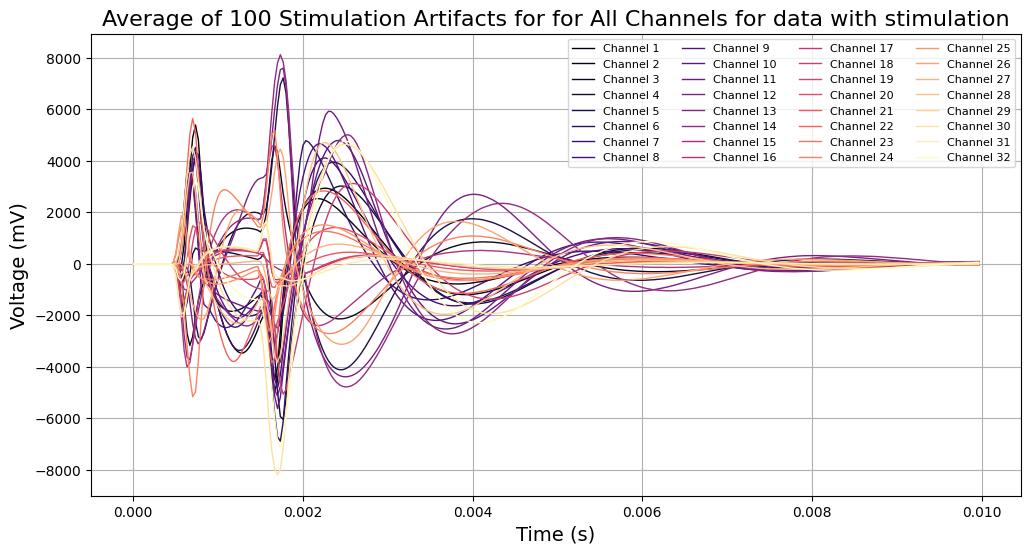

In [72]:
plot_average_stimulation_artifacts(stimulation_artifacts_all_eyes_TTX[eye_index])

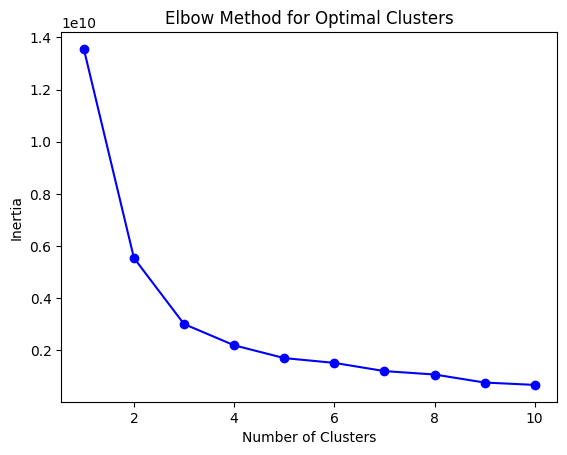

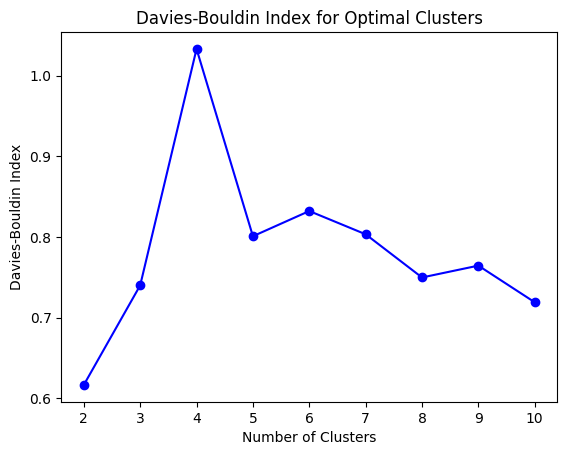

In [73]:
inertia = []
K_range = range(1, 11)  # Test for 1 to 10 clusters

for k in K_range:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(stimulation_artifacts_all_eyes_TTX[eye_index])
    inertia.append(kmeans.inertia_)

# Plot inertia vs. number of clusters
plt.plot(K_range, inertia, 'bo-')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Clusters')
plt.show()

from sklearn.metrics import davies_bouldin_score

db_scores = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k)
    labels = kmeans.fit_predict(stimulation_artifacts_all_eyes_TTX[eye_index])
    db_scores.append(davies_bouldin_score(stimulation_artifacts_all_eyes_TTX[eye_index], labels))

# Plot Davies-Bouldin Index vs. number of clusters
plt.plot(K_range, db_scores, 'bo-')
plt.xlabel('Number of Clusters')
plt.ylabel('Davies-Bouldin Index')
plt.title('Davies-Bouldin Index for Optimal Clusters')
plt.show()

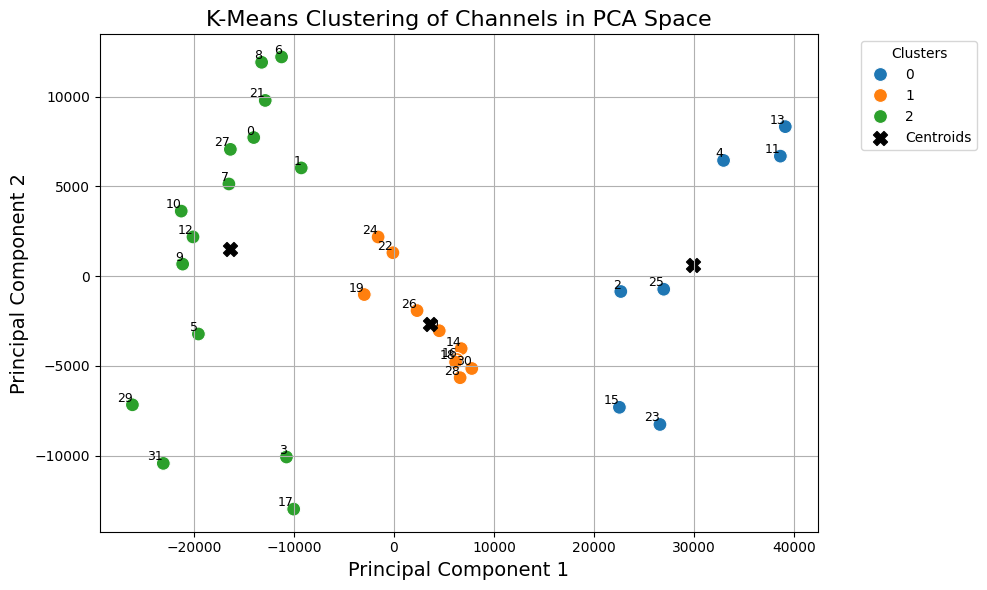

Cluster labels for each channel: [2 2 0 2 0 2 2 2 2 2 2 0 2 0 1 0 1 2 1 1 1 2 1 0 1 0 1 2 1 2 1 2]


In [80]:
n_clusters = 3
cluster_labels, extra_data_label, stimulation_artifact_ttx, extra_data, pca_model, kmeans_model = cluster_channels(stimulation_artifacts_all_eyes_TTX[eye_index], n_clusters, n_components=2)

# Print the cluster labels for each channel
print("Cluster labels for each channel:", cluster_labels)


/var/folders/4r/ky8lg5_521vcwh4ltvn3c2300000gn/T/ipykernel_79923/2093361585.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colormap = plt.cm.get_cmap(cmap)


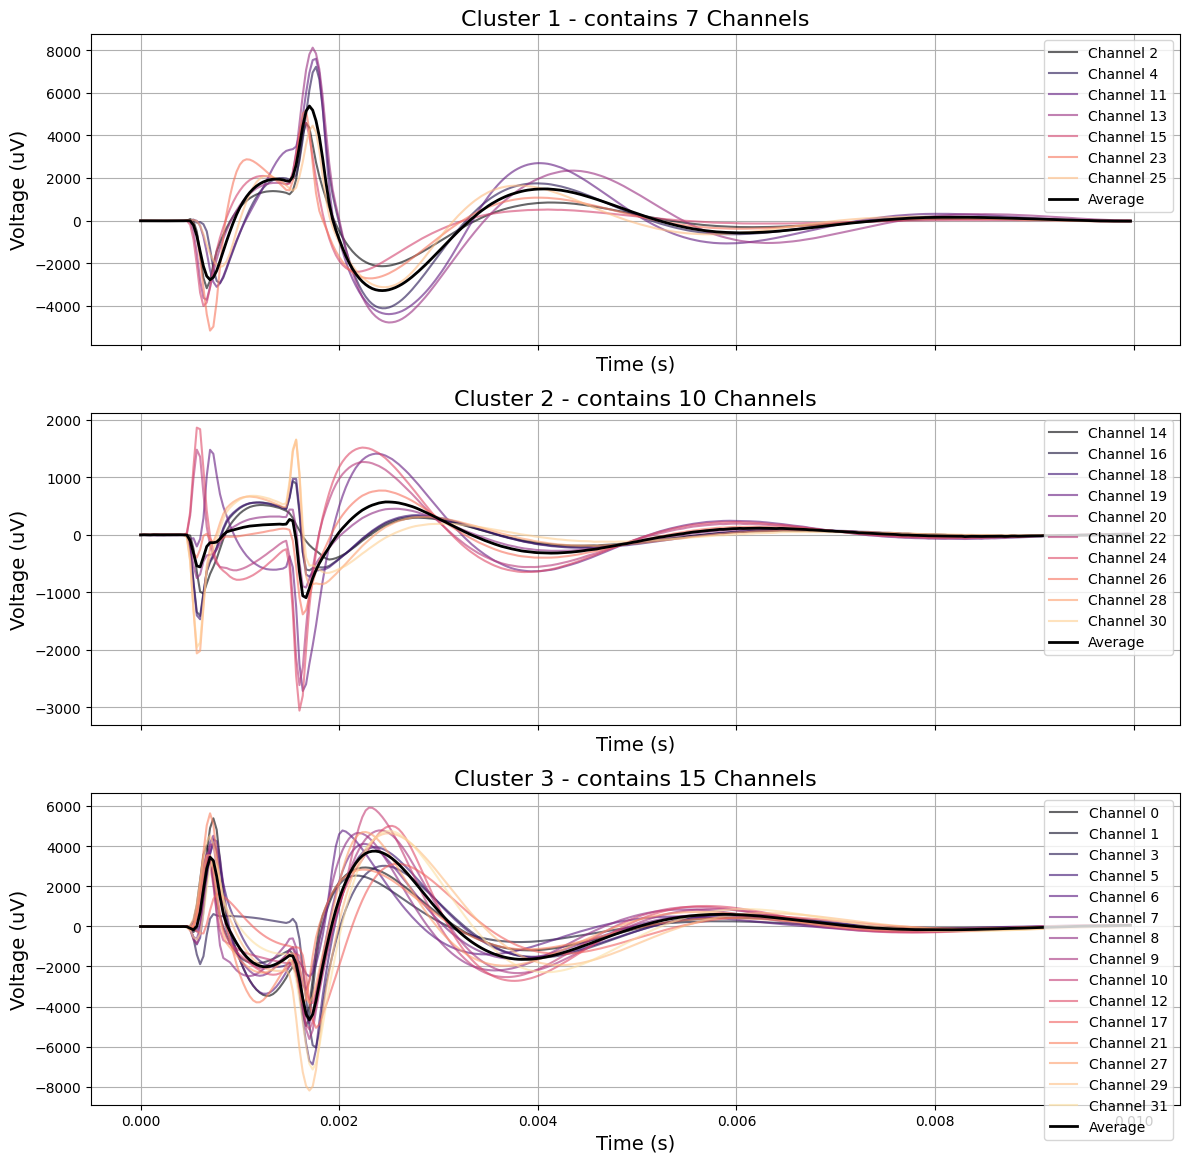

18


In [82]:
# Plot original data by clusters with average SA using the magma colormap
SA_templates_3D_TTX = plot_data_by_cluster_with_avg(stimulation_artifact_ttx, cluster_labels, n_clusters)
print(len(SA_templates_3D_TTX))


In [83]:
np.save('SA_templates_3D_TTX.npy', SA_templates_3D_TTX)

/var/folders/4r/ky8lg5_521vcwh4ltvn3c2300000gn/T/ipykernel_79923/203622519.py:16: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colormap = plt.cm.get_cmap(cmap)


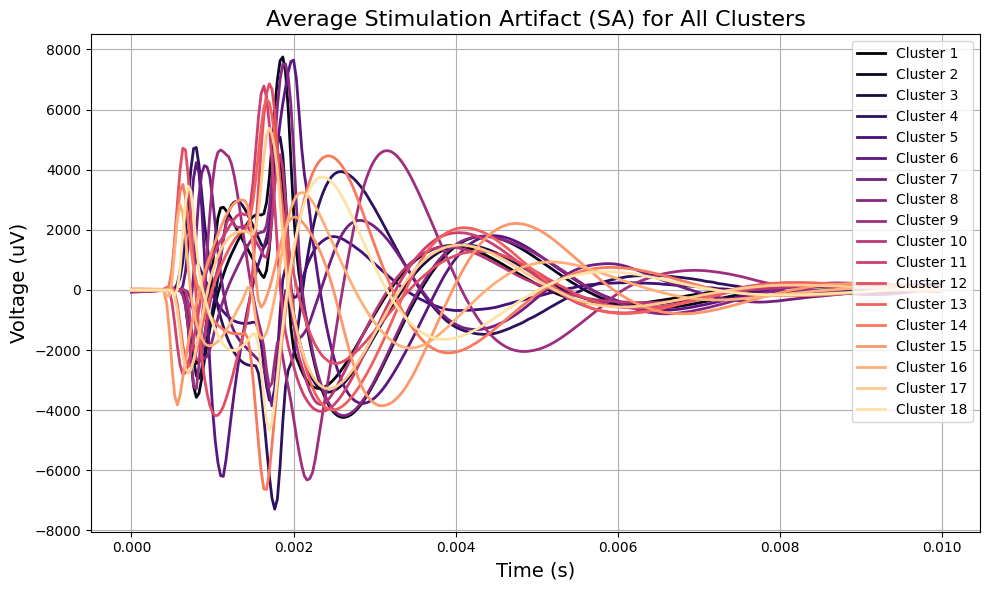

In [89]:
import matplotlib.pyplot as plt
import numpy as np

def plot_avg_clusters(avg_cluster_data_matrix, sampling_rate=30000, cmap='magma'):

    n_clusters = len(avg_cluster_data_matrix)
    time = np.arange(0, 300) / sampling_rate

    # Create the colormap
    colormap = plt.cm.get_cmap(cmap)

    # Create the plot
    plt.figure(figsize=(10, 6))

    # Plot each cluster's average SA
    for cluster in range(n_clusters):
        color = colormap(cluster / n_clusters)  # Get color from colormap
        plt.plot(time, avg_cluster_data_matrix[cluster], label=f'Cluster {cluster + 1}', color=color, linewidth=2)

    # Add labels and legend
    plt.title('Template SAs', fontsize=16)
    plt.xlabel('Time (s)', fontsize=14)
    plt.ylabel('Voltage (mV)', fontsize=14)
    plt.grid(True)
    plt.legend(loc='upper right', fontsize=10)
    plt.tight_layout()
    plt.show()

plot_avg_clusters(SA_templates_3D_TTX)


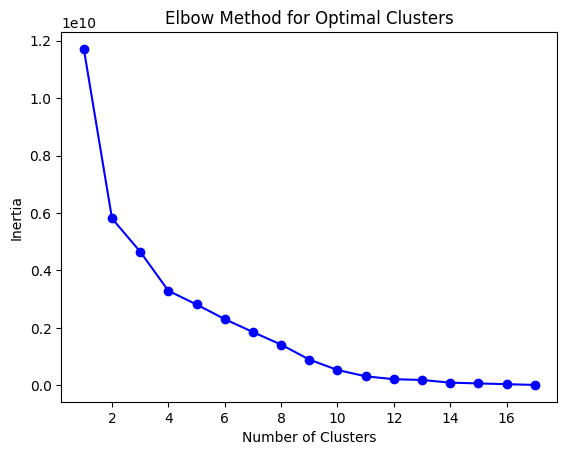

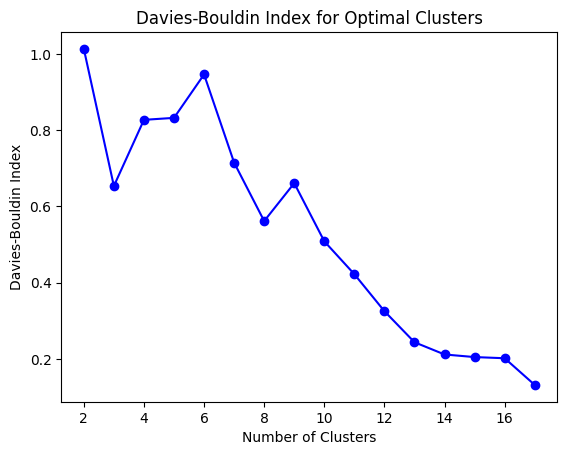

In [105]:
inertia = []
K_range = range(1, 18)  # Test for 1 to 10 clusters

for k in K_range:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(SA_templates_3D_TTX)
    inertia.append(kmeans.inertia_)

# Plot inertia vs. number of clusters
plt.plot(K_range, inertia, 'bo-')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Clusters')
plt.show()

from sklearn.metrics import davies_bouldin_score

db_scores = []
K_range = range(2, 18)

for k in K_range:
    kmeans = KMeans(n_clusters=k)
    labels = kmeans.fit_predict(SA_templates_3D_TTX)
    db_scores.append(davies_bouldin_score(SA_templates_3D_TTX, labels))

# Plot Davies-Bouldin Index vs. number of clusters
plt.plot(K_range, db_scores, 'bo-')
plt.xlabel('Number of Clusters')
plt.ylabel('Davies-Bouldin Index')
plt.title('Davies-Bouldin Index for Optimal Clusters')
plt.show()

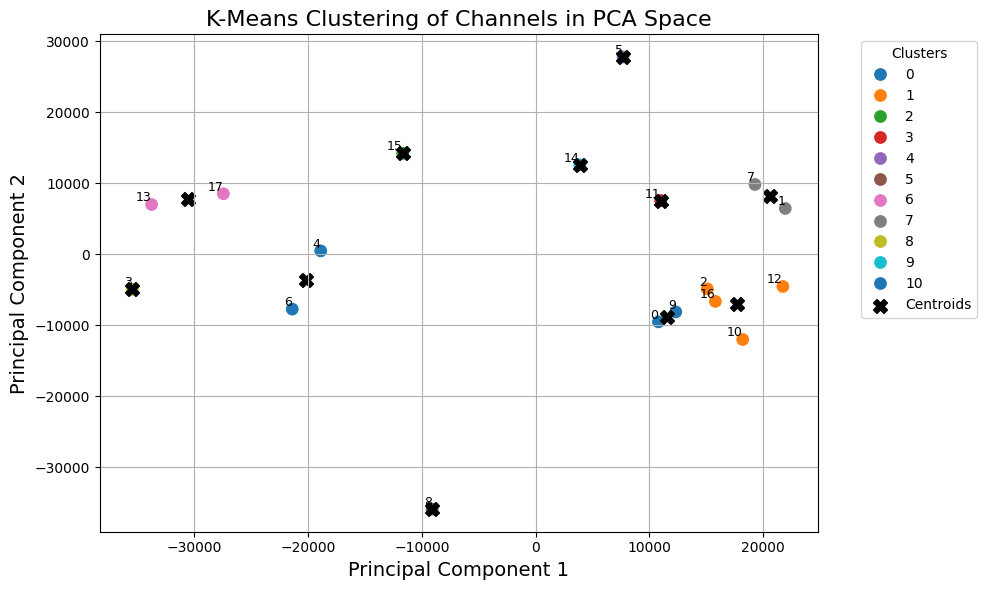

Cluster labels for each channel: [10  7  1  8  0  4  0  7  5 10  1  3  1  6  9  2  1  6]


In [110]:
n_clusters = 11
cluster_labels, extra_data_label, stimulation_artifact_ttx, extra_data, pca_model, kmeans_model = cluster_channels(SA_templates_3D_TTX, n_clusters, n_components=2)

# Print the cluster labels for each channel
print("Cluster labels for each channel:", cluster_labels)


/var/folders/4r/ky8lg5_521vcwh4ltvn3c2300000gn/T/ipykernel_79923/514604506.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colormap = plt.cm.get_cmap('magma')


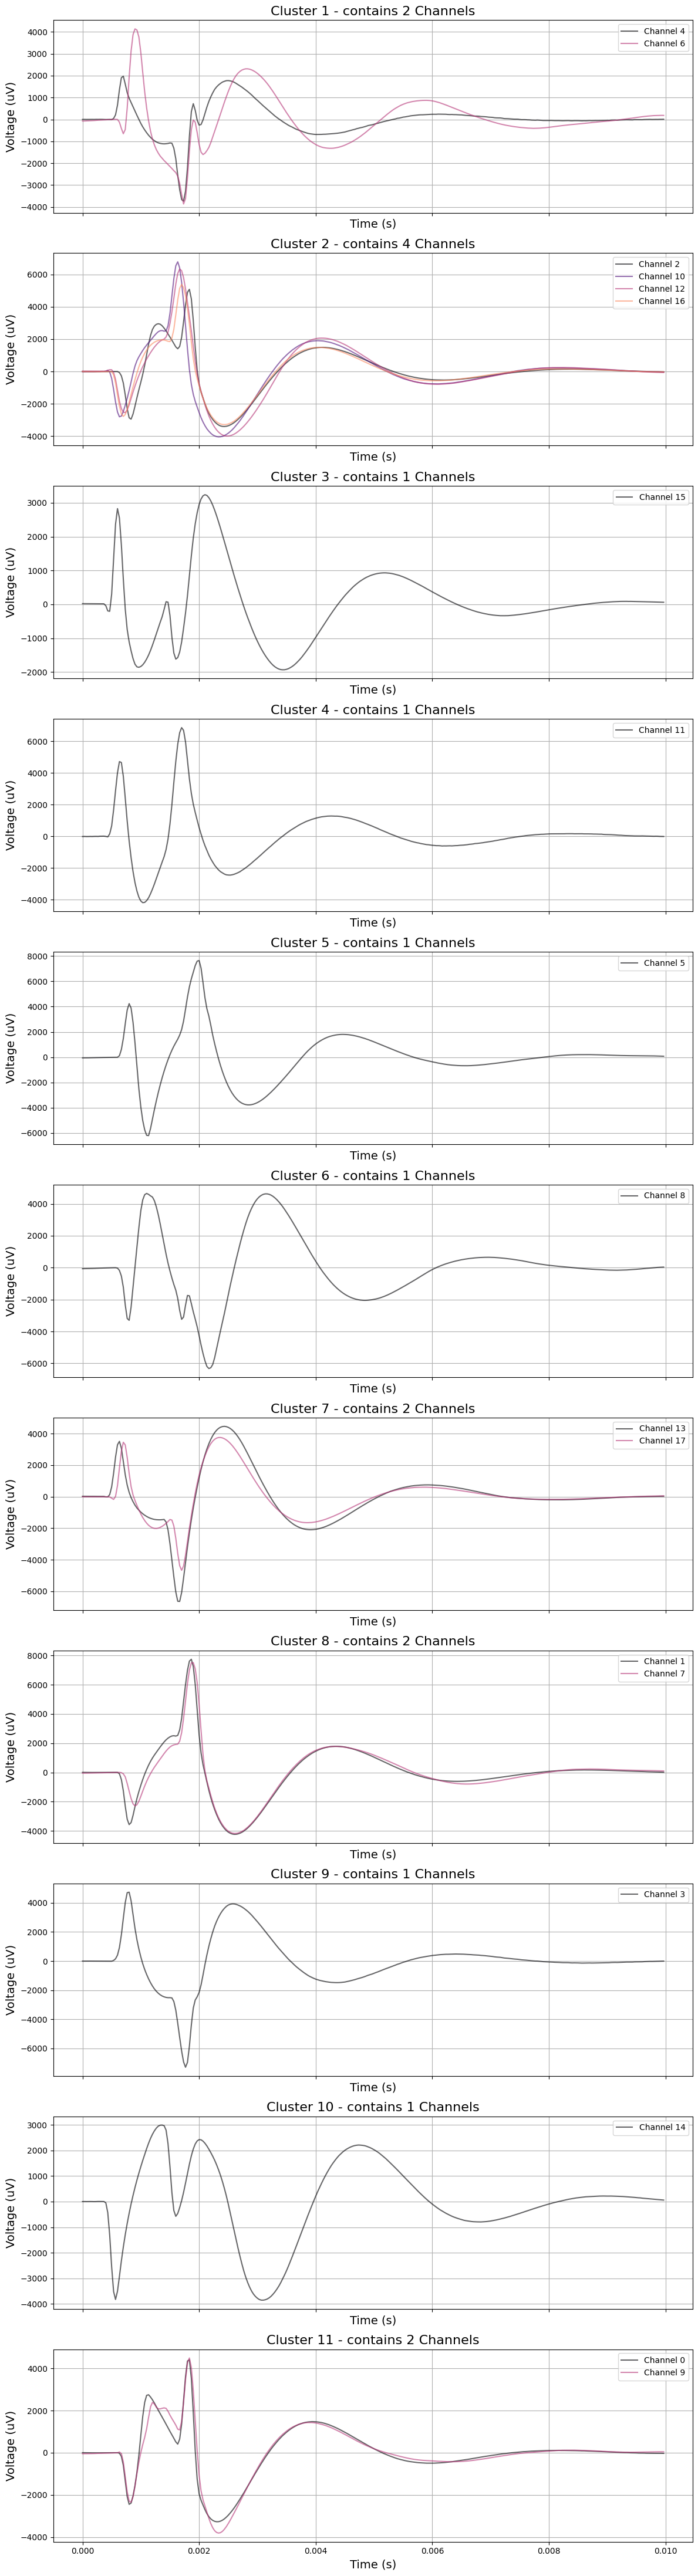

In [111]:

time = np.arange(0, 300) / 30000

fig, axs = plt.subplots(n_clusters, 1, figsize=(12, 4 * n_clusters), sharex=True)

colormap = plt.cm.get_cmap('magma')

for cluster in range(n_clusters):
    ax = axs[cluster]

    # Get channels belonging to the current cluster
    channels_in_cluster = np.where(cluster_labels == cluster)[0]
    n_channels = len(channels_in_cluster)

    # Plot each channel in the cluster with colors from the magma colormap
    for i, channel in enumerate(channels_in_cluster):
        color = colormap(i / n_channels)  # Color from colormap based on index
        ax.plot(time, stimulation_artifact_ttx[channel], alpha=0.6, label=f'Channel {channel}', color=color)
    
    ax.set_title(f'Cluster {cluster + 1} - contains {len(channels_in_cluster)} Channels', fontsize=16)
    ax.set_xlabel('Time (s)', fontsize=14)
    ax.set_ylabel('Voltage (uV)', fontsize=14)
    ax.grid(True)
    ax.legend(loc='upper right', fontsize=10)

plt.tight_layout()
plt.show()
